In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.shape, df.isna().sum().sum()

((200, 5), 0)

In [5]:
X = df.iloc[:, 3:]

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

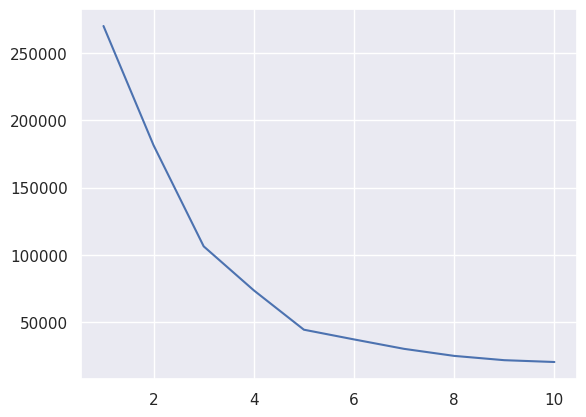

In [6]:
sns.set()
plt.plot(range(1,11), inertia)
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, n_init=10)

y = kmeans.fit_predict(X)
silhouette_score(X, y)

0.553931997444648

In [8]:
X = X.to_numpy()

<Figure size 800x800 with 0 Axes>

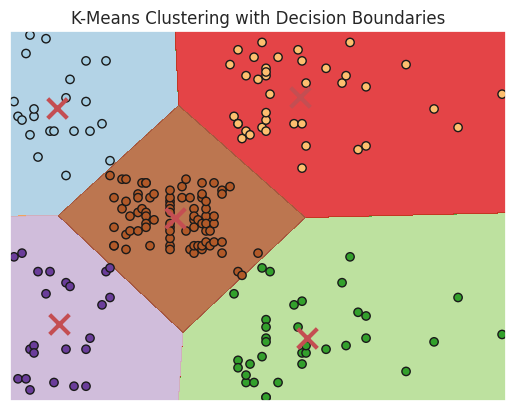

In [12]:
# ChatGPT generated code

# Visualize the decision boundaries
h = 0.02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))

# Plot the decision boundaries
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.title('K-Means Clustering with Decision Boundaries')
plt.show()